<a href="https://colab.research.google.com/github/nicolasurregov/ingenieria_de_caracteristicas/blob/main/Ingenieria_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería de características

En este proyecto, abordaremos la disciplina esencial de la **ingeniería de características** en el ámbito de la ciencia de datos y el aprendizaje automático. Mi enfoque se centra en la aplicación práctica de diversas herramientas y técnicas, haciendo uso principalmente de la biblioteca de Python, **scikit-learn**, reconocida por su robustez y amplia aceptación en la comunidad de científicos de datos.

Para llevar a cabo mi trabajo, aprovecharé una serie de herramientas clave además de scikit-learn. Estas incluyen **pandas**, que nos permite la manipulación eficiente de datos; **numpy**, que facilita los cálculos numéricos fundamentales; y **scipy**, que nos proporciona una base sólida para realizar operaciones científicas rigurosas. Además, utilizaré **matplotlib** para la visualización de datos, lo que contribuirá a una comprensión más profunda de los mismos.

En la esencia de este proyecto se encuentra scikit-learn, una biblioteca que alberga módulos especializados para abordar una variedad de procesos de ingeniería de características. Exploraremos aspectos clave como el preprocesamiento de datos a través de **sklearn.preprocessing**, la selección de características inteligente mediante **sklearn.feature_selection** y la reducción de la dimensionalidad a través de técnicas avanzadas como PCA mediante **sklearn.decomposition**.

Mi objetivo principal es capacitar para afrontar de manera eficiente problemas complejos mediante la mejora de las características de los datos. En el transcurso de este proyecto, desbloquearemos conocimientos valiosos y habilidades cruciales que te permitirán abordar desafíos en el mundo real con una perspicacia más aguda.

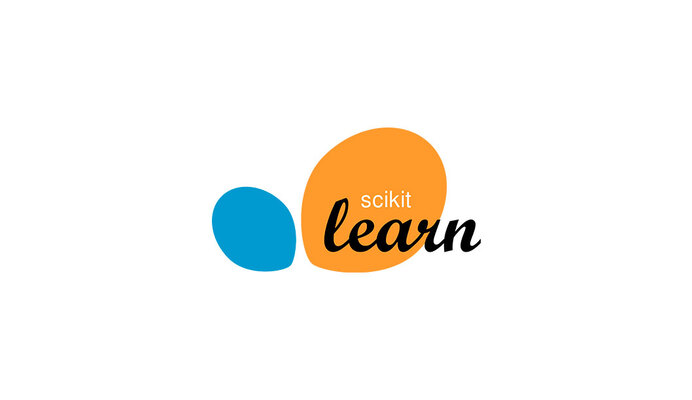

In [4]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Análisis descriptivo de las variables.

El análisis descriptivo de las variables desempeña un papel esencial en el proceso de ingeniería de características dentro del ámbito de la ciencia de datos y el aprendizaje automático. En esta etapa, se llevan a cabo diversas operaciones técnicas con el propósito de obtener una comprensión profunda y cuantitativa de las características que componen un conjunto de datos.

Proporciona una base técnica sólida para el proceso de ingeniería de características. Permite comprender la naturaleza de los datos, detectar patrones y particularidades, y tomar decisiones informadas sobre cómo preprocesar y utilizar las características en la construcción de modelos de aprendizaje automático. Es una etapa esencial que sienta las bases para el éxito de todo el proyecto de ciencia de datos.

Vamos a realizar este proceso utilizando un conjunto de datos que reune información sobre diferentes especies de pingüinos:

In [73]:
# Cargamos nuestro conjunto de datos
data = pd.read_csv('/content/penguins.csv')

# Mostramos el DataFrame
data

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [83]:
# Obtenemos el tipo de datos de cada columna en el DataFrame
data.dtypes

Species                 object
Region                  object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

Si en este paso observamos que hay alguna columna que tiene el tipo equivocado, deberían cambiarse al formato adecuado.

Además también es conveniente en este paso comprobar si existen valores vacíos para su posterior tratmiento, como explicaremo en los siguientes pasos:

In [84]:
# Verificar si hay valores nulos en el DataFrame "data"
missing_values = data.isnull().sum()

# Mostrar la cantidad de valores nulos en cada columna
print(missing_values)

Species                 0
Region                  0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


### Métricas descriptivas numéricas

Calcular métricas estadísticas fundamentales como la media, mediana, desviación estándar, percentiles 25 y 75, mínimo y máximo para las variables numéricas es una práctica esencial. Estas métricas proporcionan una visión detallada de la distribución y dispersión de los datos. La media y la mediana ofrecen información sobre la tendencia central de la variable, mientras que la desviación estándar cuantifica su dispersión. Los percentiles revelan información sobre la distribución de los valores en todo el rango, y el mínimo y el máximo definen los límites observados.

In [74]:
# Obtener métricas descriptivas para variables numéricas
numeric_stats = data.describe()

# Imprimir las métricas
print(numeric_stats)

       Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          342.000000         342.000000           342.000000   
mean            43.921930          17.151170           200.915205   
std              5.459584           1.974793            14.061714   
min             32.100000          13.100000           172.000000   
25%             39.225000          15.600000           190.000000   
50%             44.450000          17.300000           197.000000   
75%             48.500000          18.700000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
count     342.000000         330.000000         331.000000  
mean     4201.754386           8.733382         -25.686292  
std       801.954536           0.551770           0.793961  
min      2700.000000           7.632200         -27.018540  
25%      3550.000000           8.299890         -26.320305  
50%      405

### Tablas de frecuencia para variables categóricas

Para las variables categóricas, la construcción de tablas de frecuencia es un procedimiento esencial. Estas tablas muestran cuántas veces aparece cada categoría en los datos, lo que es esencial para comprender la distribución de las clases y la proporción de cada categoría en el conjunto de datos.

In [79]:
# Obtener tablas de frecuencia para variables categóricas
categorical_columns = data.select_dtypes(include='object')

for column in categorical_columns:
    print(data[column].value_counts())
    print("\n" + "-"*40 + "\n")

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

----------------------------------------

Anvers    344
Name: Region, dtype: int64

----------------------------------------

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

----------------------------------------

Yes    308
No      36
Name: Clutch Completion, dtype: int64

----------------------------------------

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

----------------------------------------



### Histogramas y diagramas de frecuencia

La visualización es una parte crucial del análisis descriptivo. La creación de histogramas para datos numéricos y diagramas de frecuencia para datos categóricos permite representar gráficamente las distribuciones de las variables. Estas representaciones visuales ayudan a identificar patrones, asimetrías, bimodalidades o cualquier particularidad en la estructura de los datos.

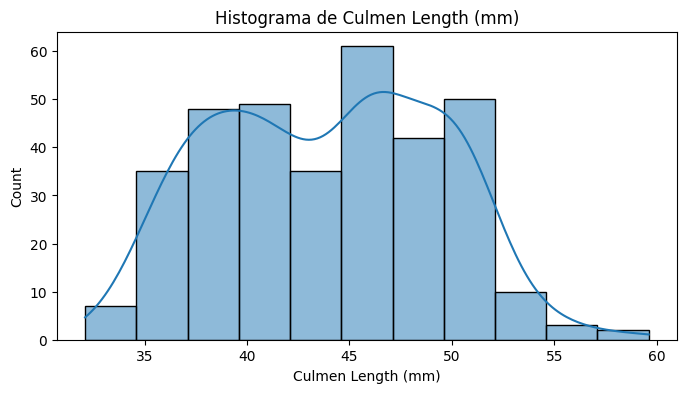

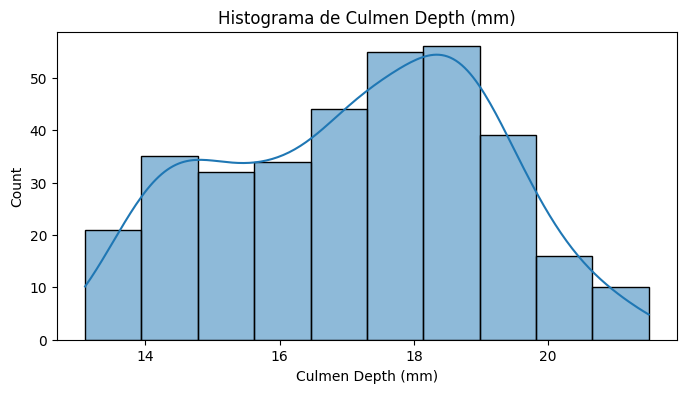

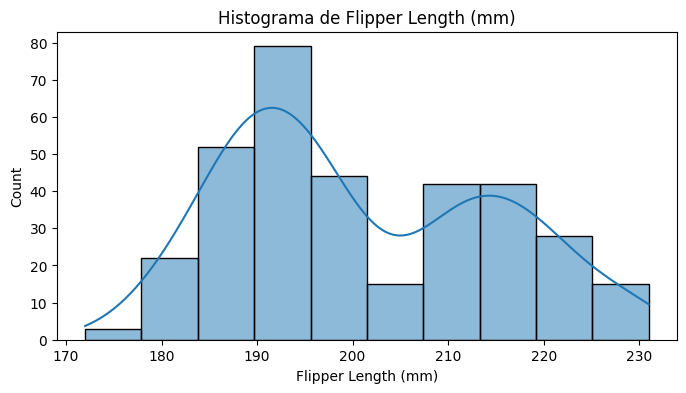

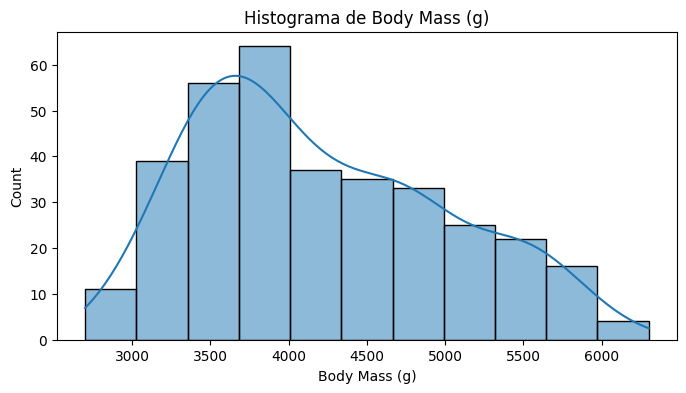

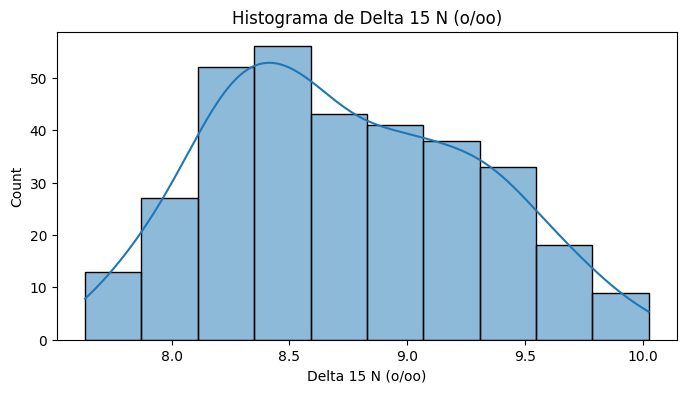

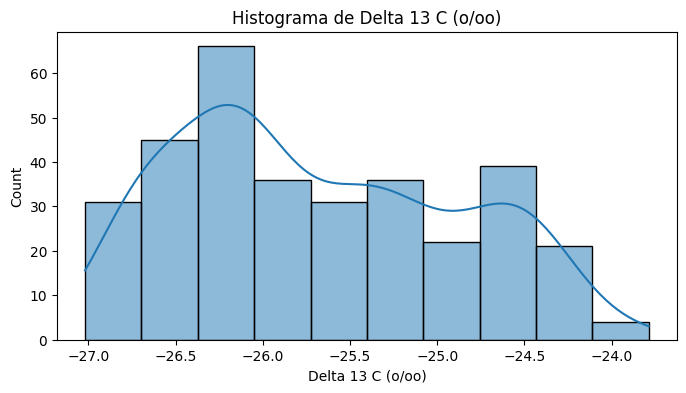

In [81]:
# Histogramas para variables numéricas
numeric_columns = data.select_dtypes(include='number')

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()

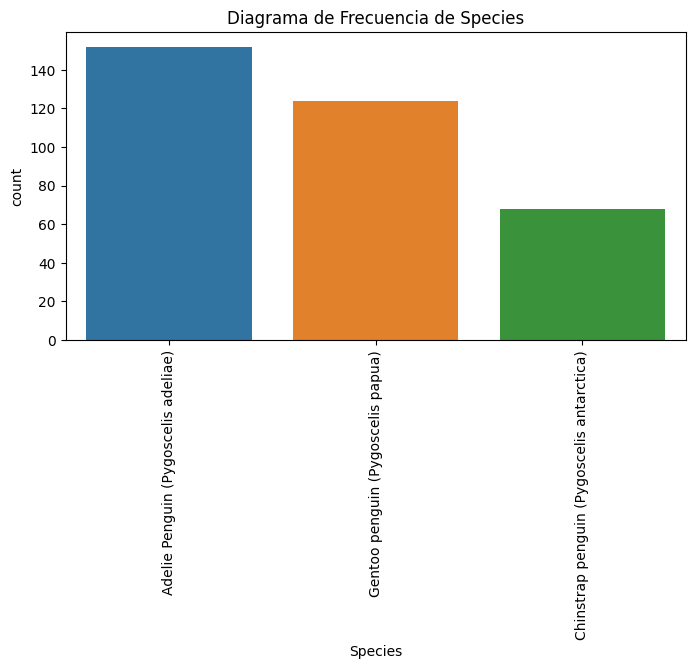

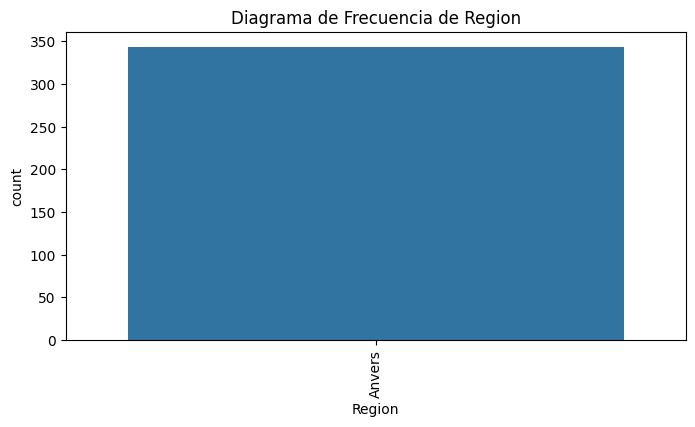

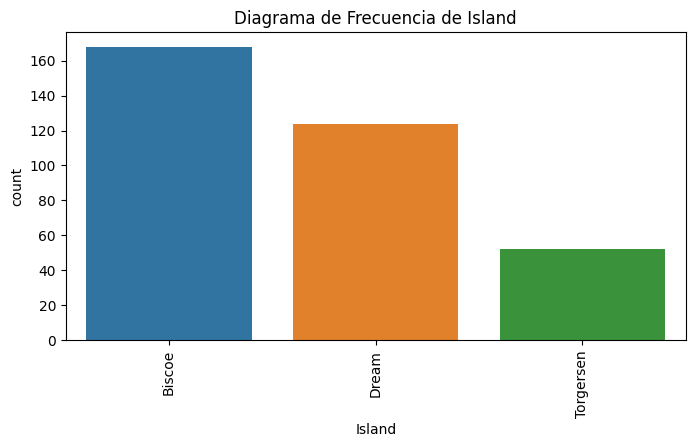

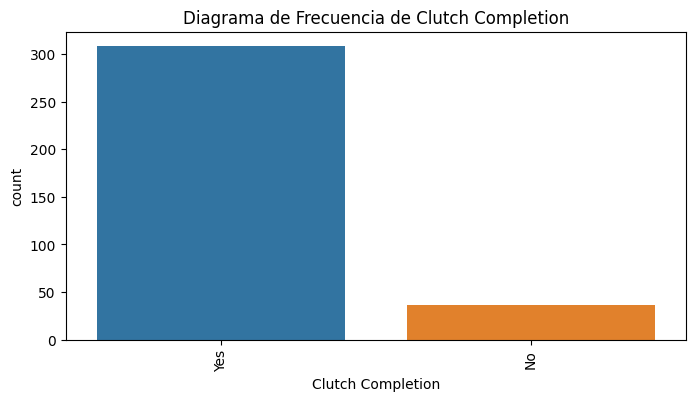

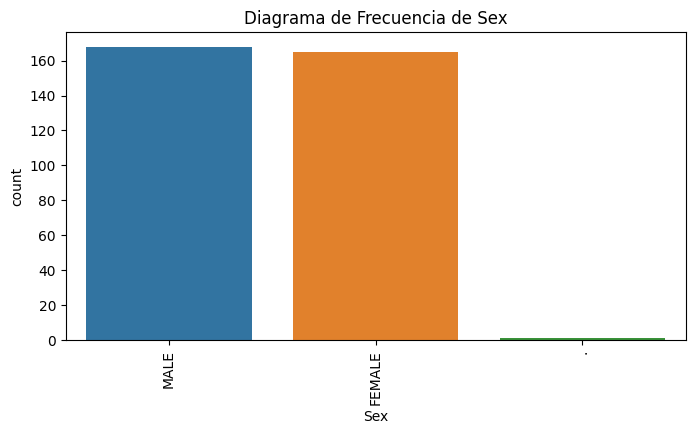

In [82]:
# Diagramas de frecuencia para variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Diagrama de Frecuencia de {column}')
    plt.xticks(rotation=90)
    plt.show()

El examen de histogramas y diagramas de frecuencia permite responder preguntas importantes sobre las características de los datos. ¿Siguen una distribución normal o están sesgados? ¿Presentan picos múltiples o modas? ¿Existen valores atípicos evidentes? Estas observaciones son esenciales para la selección de técnicas de procesamiento de datos y modelos de aprendizaje automático adecuados.

Por ejemplo podemos observar que en la variable "Sex" tenemos un valor diferente a MALE o FEMALE, es un punto, que no se refiere al sexo del animal.

## Detección de outliers y valores no observados

### Outliers

Los **outliers** en nuestro conjunto de datos se definen como valores que se encuentran significativamente alejados del rango en el que se concentran la mayoría de las observaciones. En otras palabras, son observaciones que se distinguen considerablemente de las demás en términos de su magnitud.

Para identificar de manera cualitativa los outliers, inicialmente empleamos el diagrama de caja (box plot) para cada una de las variables presentes en el conjunto de datos. Este gráfico nos proporciona una visualización clara de la distribución y ubicación de los valores extremos en las variables.

Posteriormente, utilizamos diversas reglas y algoritmos destinados a la detección y caracterización de outliers. Este análisis puede llevarse a cabo considerando las variables de manera individual o de manera conjunta. Me enfocaré en los siguientas técnicas:

1. **Regla basada en la media y desviación estándar:** Para cada variable, identificamos como outliers aquellos valores que caen por debajo de la media menos 2.5 veces la desviación estándar (μ - 2.5σ) o por encima de la media más 2.5 veces la desviación estándar (μ + 2.5σ). Es importante destacar que el valor 2.5 puede ser ajustado por un experto en función de las características específicas de los datos. No obstante, el valor predeterminado es 2.5.

2. **Regla basada en cuartiles y rango intercuartílico:** Para cada variable, consideramos como outliers aquellos valores que superan 1.5 veces el rango intercuartílico (IQR) por encima del tercer cuartil (Q3) o por debajo del primer cuartil (Q1). Similar a la regla anterior, el factor de 1.5 puede ser modificado según las necesidades del análisis, generalmente en un rango entre 1.5 y 3.

En un enfoque conjunto que abarca todas las variables del conjunto de datos, podemos emplear el algoritmo de la "**Envolvente Elíptica**" (Elliptic Envelope en inglés), el cual se encuentra disponible en la biblioteca scikit-learn. Este algoritmo considera la estructura de covarianza entre las variables y es particularmente eficaz cuando los datos siguen una distribución normal.

En resumen, utilizamos diversas estrategias cualitativas y cuantitativas, incluyendo medidas basadas en estadísticas descriptivas y algoritmos avanzados, para detectar y analizar los outliers en nuestros datos. Estas técnicas son fundamentales para garantizar la integridad y calidad de nuestros análisis posteriores.

A continuación, se expondrá la aplicación del método de la Envolvente y se presentarán los resultados obtenidos al implementarlo en el conjunto de datos outliers.csv. Este proceso nos permitirá identificar y evaluar la presencia de outliers en el mencionado conjunto de datos.

In [21]:
# Cargamos nuestro conjunto de datos
outliers = pd.read_csv('/content/outliers.csv').dropna(how='all')

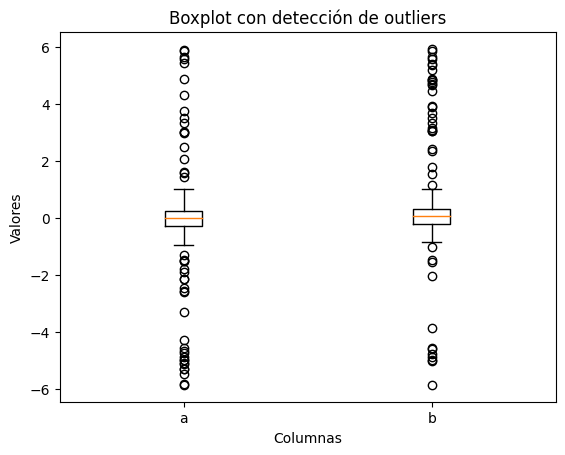

In [28]:
# boxplot para detección de outliers
plt.boxplot([outliers['a'], outliers['b']], labels=['a', 'b'])

# Mostramos el gráfico
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Boxplot con detección de outliers')
plt.show()

Gracias a este boxplot podemos detectar de forma visual los outliers tanto en el extremo inferior como en el superior, por lo tanto tenemos la certeza de que existen en nuestro dataset y deben ser tratados.

Podemos visualizar de otra forma estos outliers si repartimos los datos en una dispersión de puntos, aquellos que esten alejados de nuestro centro de datos podemos considerarlos como outliers.

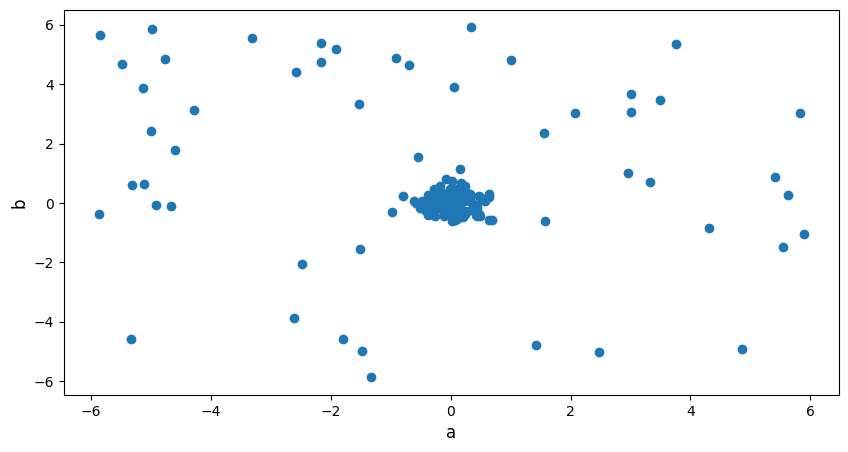

In [29]:
# Dispersión de puntos para detección de outliers
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(outliers.a.values, outliers.b.values)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

En el siguiente código, he creado una función personalizada diseñada para aplicar el método de la Envolvente Elíptica a un conjunto de datos con el propósito de detectar outliers de manera eficiente y reutilizable.

La función `detectar_outliers_elliptic` utiliza la biblioteca `scikit-learn` y se compone de varios pasos clave:

1. **Creación del objeto de Envolvente Elíptica**: Se crea un objeto de Envolvente Elíptica que servirá como modelo para la detección de outliers.

2. **Ajuste del modelo**: El modelo se ajusta a los datos de entrada, permitiendo que la Envolvente Elíptica se adapte a la distribución de los datos.

3. **Cálculo de puntuaciones de decisión**: Se calculan las puntuaciones de decisión para cada muestra en el conjunto de datos. Estas puntuaciones indicarán la "anomalía" de cada muestra con respecto al modelo.

4. **Identificación de outliers**: Basándose en las puntuaciones de decisión, se determinan las muestras que se consideran outliers. Aquellas muestras con puntuaciones de decisión por debajo de un umbral predefinido se etiquetan como outliers.

5. **Devolución de resultados**: La función devuelve los índices de las muestras consideradas outliers, así como las filas correspondientes del DataFrame original.

Este enfoque de encapsular la funcionalidad en una función mejora la modularidad del código, permitiendo su fácil reutilización en distintos contextos y conjuntos de datos. Esta práctica es altamente recomendable en programación, ya que simplifica el mantenimiento y promueve la consistencia en el análisis de datos. A continuación, se muestra cómo se utiliza esta función para detectar outliers en un DataFrame denominado "outliers".

In [31]:
#Cargar librerías para utilizar el método de la Envelope
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [54]:
# Función para aplicar el método Envolvente Elíptica a los datos para detectar los Outliers

def detectar_outliers_elliptic(df):
  # Crear un objeto EllipticEnvelope para detección de outliers
  outlier_method = EllipticEnvelope()

  # Ajustar el modelo a los datos
  outlier_method.fit(df)

  # Calcular los valores de puntuación (scores) para cada muestra
  scores_pred = outlier_method.decision_function(df)

  # Identificar los índices de las muestras consideradas como outliers
  idx_outliers = np.where(scores_pred < 0)[0]

  # Devolver los índices de los outliers y las filas correspondientes en el DataFrame original
  return idx_outliers, df.iloc[idx_outliers, :]

# Llamar a la función para detectar outliers en el DataFrame "outliers"
idx_outliers_m0, valores_outliers_m0 = detectar_outliers_elliptic(outliers)

# Mostramos los indices de los valores outliers y sus respectivos valores
detectar_outliers_elliptic(outliers)

(array([152, 154, 157, 160, 161, 162, 174, 175, 176, 177, 179, 180, 185,
        186, 189, 191, 192, 193, 194, 196]),
             a         b
 152  5.886062 -1.048588
 154 -1.910358  5.169088
 157 -4.762514  4.830635
 160 -1.329580 -5.869948
 161  4.864584 -4.904560
 162 -2.168236  5.400744
 174 -4.990718  2.411630
 175 -5.126844  3.862321
 176  2.474907 -5.023815
 177 -4.981947  5.839675
 179  3.753595  5.366983
 180  5.832013  3.040538
 185 -5.863756 -0.376072
 186 -5.324361 -4.574185
 189  5.546071 -1.501553
 191 -3.316850  5.558670
 192 -5.854146  5.638546
 193 -5.482081  4.693717
 194  0.332413  5.915578
 196  5.631630  0.277174)

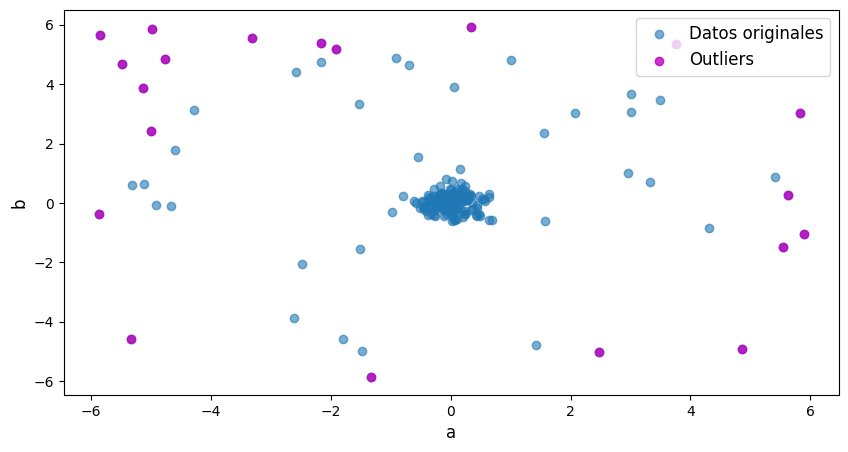

In [55]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico de dispersión para los datos originales
ax.scatter(outliers.a, outliers.b, label='Datos originales', alpha=0.6)

# Gráfico de dispersión para los outliers identificados
ax.scatter(outliers.a[idx_outliers_m0], outliers.b[idx_outliers_m0], c='m', label='Outliers', alpha=0.8)

# Modificamos el aspecto del gráfico
plt.legend(fontsize=12)
plt.xlabel('a', fontsize=12)
plt.ylabel('b', fontsize=12)

# Mostrar el gráfico
plt.show()

Adicionalmente, es posible emplear los valores contenidos en `scores_pred` para establecer un umbral más específico a partir del cual los valores se considerarán como outliers. La elección del umbral se basa comúnmente en un percentil específico de la distribución de datos, como el percentil 25, 20 o 10, dependiendo de las características de los datos y la naturaleza del análisis. Esta flexibilidad en la elección del umbral permite adaptar la detección de outliers de manera más precisa a las necesidades del problema.

La modificación de la función se muestra a continuación, donde se incorpora la definición del umbral en función del percentil seleccionado, lo que facilita la personalización del proceso de detección de outliers para diferentes conjuntos de datos y escenarios analíticos.

In [57]:
# Importamos la clase EllipticEnvelope desde sklearn.covariance
from sklearn.covariance import EllipticEnvelope

# Definimos una función llamada 'detect_outliers_with_percentile_threshold' que toma un DataFrame 'df' y un 'percentil' como entrada
def detect_outliers_with_percentile_threshold(df, percentil):
    # Creamos una instancia de la clase EllipticEnvelope que se utilizará para detectar outliers
    outlier_method = EllipticEnvelope()

    # Ajustamos el modelo y calculamos la función de decisión para los datos en 'df'
    scores_pred = outlier_method.fit(df).decision_function(df)

    # Calculamos el umbral utilizando el percentil proporcionado
    threshold = np.percentile(scores_pred, percentil)

    # Encontramos los índices de los outliers basados en el umbral
    idx_outliers = np.where(scores_pred <= threshold)[0]

    # Devolvemos los índices de los outliers y los valores de los outliers en un nuevo DataFrame
    return idx_outliers, df.iloc[idx_outliers, :]

# Llamamos a la función 'detect_outliers_with_percentile_threshold' con el conjunto de datos 'outliers' y un percentil del 25
idx_outliers, valores_outliers = detect_outliers_with_percentile_threshold(outliers, 25)

# Mostramos los índices de los outliers y sus valores respectivos.
detect_outliers_with_percentile_threshold(outliers, 25)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]),
             a         b
 150 -2.615585 -3.870725
 151  3.007377  3.682017
 152  5.886062 -1.048588
 153 -1.535783  3.316956
 154 -1.910358  5.169088
 155  4.300953 -0.852072
 156  3.010453  3.054514
 157 -4.762514  4.830635
 158  0.063028  3.917490
 159 -2.159405  4.746279
 160 -1.329580 -5.869948
 161  4.864584 -4.904560
 162 -2.168236  5.400744
 163  5.407286  0.881255
 164  1.582047 -0.618654
 165 -2.481471 -2.056025
 166  2.070221  3.028494
 167  3.498949  3.475418
 168 -4.905527 -0.066956
 169 -5.309295  0.594347
 170 -0.701634  4.652450
 171 -1.789020 -4.595196
 172 -4.284100  3.138128
 173  1.418617 -4.786528
 174 -4.990718  2.411630
 175 -5.126844  3.862321
 176  2.474907 -5.023815
 177 -4.981947  

Podemos observar que en comparación con la función anterior, hemos detectado mas outliers modificando el umbral, por lo tanto la selección de uno u otro percentil vendrá determinado por el objetivo de nuestro análisis y el dataset con el que estamos trabajando.

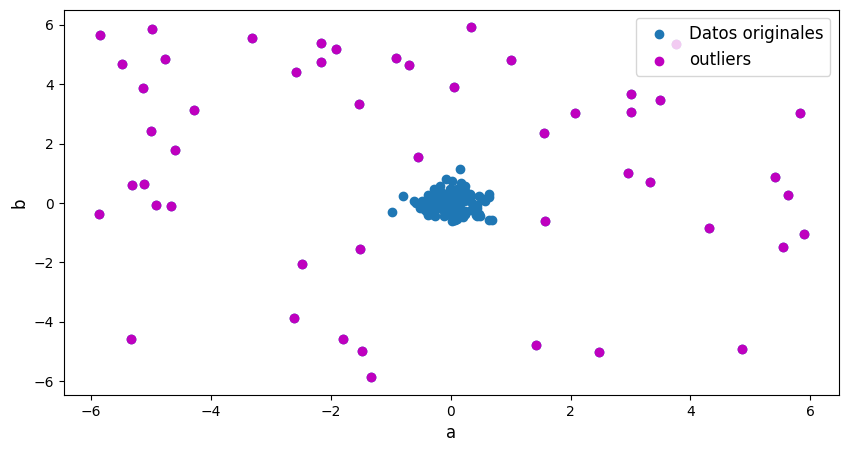

In [58]:
# Representación de los resultados

# Extraer valores de los outliers detectados
outliers_a = outliers.a.values[idx_outliers_m0_umbral]
outliers_b = outliers.b.values[idx_outliers_m0_umbral]

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Dibujar los puntos de datos originales
ax.scatter(outliers.a.values, outliers.b.values, label='Datos originales')

# Dibujar los outliers en color magenta
ax.scatter(outliers_a, outliers_b, c='m', label='outliers')

# Configurar la leyenda y etiquetas de ejes
plt.legend(fontsize=12)
plt.xlabel('a', fontsize=12)
plt.ylabel('b', fontsize=12)

# Mostrar el gráfico
plt.show()

### Tratamiento de valores vacíos

A menudo, los datos recopilados pueden contener registros incompletos, lo que requiere estrategias efectivas de imputación para mantener la integridad y utilidad de los conjuntos de datos.

La interpolación, como método de imputación, nos permite estimar los valores faltantes en función de los valores observados circundantes. En lugar de aplicar una estimación simple, como la media o la mediana, la interpolación considera la estructura de los datos y puede proporcionar estimaciones más precisas y contextualmente relevantes.

La interpolación ofrece una variedad de enfoques, desde el uso del valor más cercano hasta técnicas más avanzadas como la interpolación lineal y cúbica. A continuación, presentaremos un ejemplo concreto de cómo implementar diferentes tipos de interpolación en Python, destacando cómo cada uno puede influir en el proceso de imputación y en la calidad de los datos resultantes. Este enfoque, además de ser técnico, brinda una visión más detallada y versátil de la imputación de datos, lo que resulta esencial en el análisis y modelado de datos avanzados.

<Figure size 1000x600 with 0 Axes>

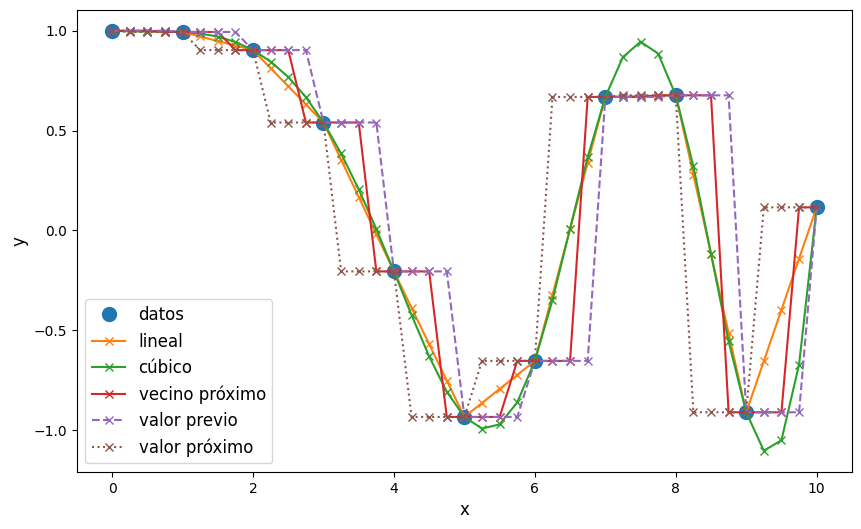

In [59]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

xnew = np.linspace(0, 10, num=41, endpoint=True)

# Realizar interpolación lineal con los puntos originales (x, y)
f = interp1d(x, y)

# Realizar interpolación cúbica con los puntos originales (x, y)
f1 = interp1d(x, y, kind='cubic')

# Realizar interpolación utilizando el método del vecino más próximo
f2 = interp1d(x, y, kind='nearest')

# Realizar interpolación utilizando el método del valor previo
f3 = interp1d(x, y, kind='previous')

# Realizar interpolación utilizando el método del valor próximo
f4 = interp1d(x, y, kind='next')

# Crear un gráfico para visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', ms='10')  # Puntos originales
plt.plot(xnew, f(xnew), 'x-', xnew, f1(xnew), 'x-')  # Interpolación lineal y cúbica
plt.plot(xnew, f2(xnew), 'x-', xnew, f3(xnew), 'x--', xnew, f4(xnew), 'x:')  # Otros métodos de interpolación
plt.legend(['datos', 'lineal', 'cúbico', 'vecino próximo', 'valor previo', 'valor próximo'], loc='best', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()

El tratamiento de valores vacíos es fundamental en la ingeniería de características por varias razones importantes:

1. **Impacto en el rendimiento del modelo**: Los modelos de aprendizaje automático suelen requerir datos completos para funcionar correctamente. La presencia de valores vacíos puede llevar a un rendimiento deficiente del modelo y a predicciones inexactas.

2. **Pérdida de información**: Cada valor faltante representa una pérdida de información valiosa en los datos. Si no se aborda adecuadamente, se pueden perder patrones importantes que pueden ser cruciales para la toma de decisiones y la precisión del modelo.

3. **Sesgo y distorsión de resultados**: Los valores vacíos pueden introducir sesgos en los resultados del modelo. Esto puede llevar a conclusiones incorrectas o a la toma de decisiones sesgadas si no se manejan de manera adecuada.

4. **Mejora de la precisión**: Tratar los valores vacíos de manera efectiva puede mejorar la precisión general del modelo. Al imputar valores para los datos faltantes de manera inteligente, se pueden obtener predicciones más precisas y significativas.

5. **Consistencia en los datos**: Los datos con valores vacíos pueden dificultar la consistencia en el conjunto de datos, lo que puede dificultar el análisis y la interpretación de los resultados.

6. **Cumplimiento normativo**: En ciertos contextos, como la industria de la salud o las finanzas, puede ser obligatorio cumplir con regulaciones que requieren la gestión adecuada de los valores vacíos para garantizar la integridad de los datos y la privacidad del paciente o el cliente.

En resumen, el tratamiento de valores vacíos es esencial para garantizar la calidad y la confiabilidad de los datos, lo que a su vez contribuye a la precisión y la eficacia de los modelos de aprendizaje automático y a la toma de decisiones informadas.

## Transformación y escalado de variables

En esta sección, vamos a trabajar las [transformaciones de datos](https://medium.com/@nicolasurrego/transformando-datos-en-oro-cómo-la-estandarización-y-normalización-mejoran-tus-resultados-fbe0840d2b94), una parte esencial de la ingeniería de características. Aquí, exploraremos varios métodos de transformación de datos, cada uno de los cuales desempeña un papel crucial en la preparación de nuestros datos para análisis y modelado. Los métodos más comúnmente utilizados incluyen:

1. **Escalado Min-Max**: Este método transforma los datos de manera que todos los valores estén en un rango específico, generalmente entre 0 y 1. Es útil cuando deseamos que todas las características tengan un impacto similar en nuestros modelos.

2. **Valor Máximo Absoluto**: Con esta técnica, escalamos los datos dividiendo cada valor por el valor absoluto máximo en el conjunto de datos. Esto garantiza que los valores estén en el rango [-1, 1] y es especialmente útil cuando se trabaja con datos que tienen valores extremadamente grandes o pequeños.

3. **Estandarización**: La estandarización, también conocida como Z-score normalization, transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es esencial cuando se utilizan algoritmos sensibles a la escala, como la regresión logística o las máquinas de soporte vectorial (SVM).

4. **Normalización**: Este método escala los datos de manera que cada fila (o muestra) tenga una norma (longitud) de 1. Es útil en algoritmos que se basan en la distancia, como el clustering K-means.

La biblioteca scikit-learn, en particular su módulo **sklearn.preprocessing**, nos brinda una implementación sencilla y eficaz de estos métodos. Puedes explorar más sobre estas transformaciones en la documentación oficial de [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

Vamos a aplicar estas técnicas utilizando el conjunto de datos "constellations.csv". Este conjunto de datos contiene información sobre constelaciones, incluyendo nombres, estrellas, magnitudes y distancias en años luz.

Comencemos cargando nuestro conjunto de datos:

In [14]:
# Cargamos nuestro conjunto de datos
data = pd.read_csv('/content/constellations.csv').dropna(how='all')

Como he mencionado anteriormente el tratamientro de valores vacíos es importante, en este caso he eliminado los datos vacíos utilizando al final del código: `dropna(how='all')`, en el caso de las transformaciones es importante por los siguientes motivos

1. **Consistencia de escala:** Muchas técnicas de transformación, como la estandarización y el escalado, dependen de la escala de los datos. La presencia de valores nulos puede alterar significativamente la escala de una característica, lo que puede conducir a resultados incorrectos o incoherentes después de la transformación.

2. **Integridad de las estadísticas:** Cuando realizas transformaciones que involucran estadísticas, como la media y la desviación estándar en la estandarización, los valores nulos pueden distorsionar estas estadísticas. Esto afectará la consistencia de tus resultados y la interpretación de las transformaciones.

3. **Interpretación de resultados:** Cuando transformas tus datos, es esencial poder interpretar los resultados de manera coherente. Los valores nulos pueden dificultar la interpretación adecuada de los datos transformados, lo que puede afectar la toma de decisiones basadas en esos datos.



### Variables numéricas

Usaré la biblioteca scikit-learn para llevar a cabo estas transformaciones de manera eficaz y consistente. Cada técnica de transformación tiene sus propias ventajas por lo tanrto, después de aplicar estas transformaciones, creamos un nuevo DataFrame llamado **df_transform** que contiene las versiones transformadas de la columna "Distancia". Esto nos permitirá comparar y analizar los resultados de cada técnica de transformación en relación con los datos originales.

In [15]:
from sklearn.preprocessing import StandardScaler

X = data['Distancia'].values.reshape(-1, 1)

# Escalado Min - max
from sklearn.preprocessing import MinMaxScaler
X_transf_minmax = MinMaxScaler().fit_transform(X)


# Escalado Máximo absoluto
from sklearn.preprocessing import MaxAbsScaler
X_transf_maxAbs = MaxAbsScaler().fit_transform(X)


# Estandarización
from sklearn.preprocessing import StandardScaler
X_transf_estand = StandardScaler().fit_transform(X)


# Normalización
from sklearn.preprocessing import normalize
X_transf_norm = normalize(X, norm='l2',axis=0)

df_transform = pd.DataFrame()
df_transform['original'] = data['Distancia'].values
df_transform['min_max'] = X_transf_minmax
df_transform['max_abs'] = X_transf_maxAbs
df_transform['Estandarización'] = X_transf_estand
df_transform['Normalización'] = X_transf_norm

df_transform

,original,min_max,max_abs,Estandarización,Normalización
0,97.00,0.093018,0.09700,-0.511815,0.059800
1,366.00,0.363204,0.36600,0.469047,0.225639
2,411.00,0.408403,0.41100,0.633132,0.253381
3,610.00,0.608280,0.61000,1.358752,0.376065
4,16.00,0.011661,0.01600,-0.807168,0.009864
5,600.00,0.598236,0.60000,1.322288,0.369900
6,66.00,0.061882,0.06600,-0.624851,0.040689
7,42.00,0.037776,0.04200,-0.712363,0.025893
8,36.00,0.031749,0.03600,-0.734241,0.022194
9,66.00,0.061882,0.06600,-0.624851,0.040689


Los resultados de las transformaciones de la columna "Distancia" utilizando diferentes técnicas son los siguientes:

- **Original:** Estos son los valores originales de la columna "Distancia" en años luz.

- **Escalado Min-Max:** Los valores se han transformado para que estén en el rango entre 0 y 1. Por ejemplo, 97 años luz se ha transformado en 0.093018, mientras que 366 años luz se ha convertido en 0.363204.

- **Valor máximo absoluto:** Los valores se han escalado dividiendo cada valor por el valor absoluto máximo en la columna. Esto garantiza que los datos estén en el rango [-1, 1]. Por ejemplo, 97 años luz se ha convertido en 0.09700, y 366 años luz se ha convertido en 0.36600.

- **Estandarización:** Los valores se han estandarizado para que tengan una media de 0 y una desviación estándar de 1. Esto es útil cuando se trabaja con algoritmos sensibles a la escala. Por ejemplo, 97 años luz se ha convertido en -0.511815, y 366 años luz se ha convertido en 0.469047.

- **Normalización:** Los valores se han normalizado de manera que cada columna tenga una norma (longitud) de 1. Esto es beneficioso en algoritmos que se basan en la distancia. Por ejemplo, 97 años luz se ha transformado en 0.059800, y 366 años luz se ha transformado en 0.225639.

En general, estas transformaciones de datos tienen como objetivo poner los datos en una forma que sea más adecuada para su posterior análisis.

La elección de la técnica de transformación depende del contexto y de los requisitos específicos de su análisis o modelo. Por ejemplo, el escalado Min-Max es útil cuando desea mantener la interpretación relativa de los valores, mientras que la estandarización es valiosa cuando trabaja con algoritmos sensibles a la escala. La normalización es adecuada para algoritmos basados en la distancia.

Es esencial comprender cómo estas transformaciones afectan sus datos y cuál es la más adecuada para su caso particular.

### Variables categóricas

Ahora trabajaremos en las transformaciones de variables categóricas en variables numéricas, un proceso fundamental para llevar nuestros datos al siguiente nivel de análisis y modelado.

En la ingeniería de características, se nos presentan dos técnicas destacadas para abordar esta transformación: el "**One-Hot Encoder**" y el "**Ordinal Encoder**". Ambos métodos se encuentran al alcance de nuestras manos gracias al módulo `sklearn.preprocessing` de la popular librería `scikit-learn`, que hemos utilizado previamente.

1. **Ordinal Encoder:** Se emplea cuando las categorías categóricas tienen un orden o jerarquía intrínseca. Este método asigna un valor numérico único a cada categoría según su posición ordinal en la escala predefinida. Así, se conserva la información sobre la relación entre las categorías, lo que es fundamental para aplicaciones donde el orden importa, como en niveles de educación o calificaciones.

2. **One-Hot Encoder:** Esta técnica es especialmente útil cuando trabajamos con variables categóricas que no tienen una relación ordinal natural entre sus categorías. El "One-Hot Encoder" convierte cada categoría en una columna binaria separada, asignando un valor binario (1 o 0) según la presencia o ausencia de la categoría en cada fila de datos. Esto permite a nuestros algoritmos de aprendizaje automático interpretar y utilizar estas categorías de manera efectiva en su proceso de toma de decisiones.

En nuestro próximo paso, aprovecharemos estas poderosas técnicas para transformar nuestras variables categóricas en una forma numérica que sea comprensible y utilizable por nuestros algoritmos de aprendizaje automático. Gracias a estas transformaciones, avanzaremos hacia una comprensión más profunda de nuestros datos y la capacidad de construir modelos más efectivos para abordar los desafíos de nuestro proyecto.

#### Ordinal Encoder

El objetivo principal aquí es tomar la columna de datos denominada "Nombre" de nuestro conjunto de datos y convertir sus valores de nombres de galaxias en representaciones numéricas significativas.

El proceso en sí implica tres pasos clave:

1. **Preparación de datos:** Primero, tomamos la columna de "Nombre" y la convertimos en un arreglo bidimensional adecuado para el procesamiento.

2. **Entrenamiento del Ordinal Encoder:** Luego, creamos una instancia del Ordinal Encoder y lo entrenamos con los datos de "Nombre." Durante este proceso, el encoder asigna un valor numérico único a cada categoría de "Nombre" basado en su posición ordinal en la lista de categorías.

3. **Transformación de datos:** Finalmente, aplicamos la transformación a los datos de "Nombre," reemplazando los nombres de galaxias con los valores numéricos correspondientes. Esto crea una nueva representación numérica de la columna "Nombre."

Al combinar esta nueva representación numérica con nuestro conjunto de datos original, estamos preparando nuestros datos de manera efectiva para futuros análisis y modelado.

In [20]:
# Importamos la clase OrdinalEncoder del módulo sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos la columna 'Nombre' del DataFrame 'data' y la convertimos en un arreglo
# de una sola columna utilizando reshape(-1, 1)
X2 = data['Nombre'].values.reshape(-1, 1)

# Creamos una instancia de la clase OrdinalEncoder
enc = OrdinalEncoder()

# Ajustamos el OrdinalEncoder a los valores únicos presentes en la columna 'Nombre'
enc.fit(X2)

# Aplicamos la codificación ordinal a la columna 'Nombre' y guardamos el resultado en 'X2_encoded'
X2_encoded = enc.transform(X2)

# Crear un DataFrame a partir de los datos transformados
df_encoded = pd.DataFrame(X2_encoded, columns=['nombre_categorizada'])

# Concatenar el DataFrame original con el DataFrame de datos transformados
pd.concat([data, df_encoded], axis=1)

,Nombre,Estrella,Magnitud,Distancia,nombre_categorizada
0,Andrómeda,Sirrah,"2,06v",97.00,1.0
1,Antlia,Alpha Antliae,"4,24v",366.00,2.0
2,Apus,Alpha Apodis,"3,83",411.00,3.0
3,Acuarius,Sadalsuud,"2,89",610.00,0.0
4,Aquila,Altair,"0,77",16.00,4.0
5,Ara,Beta Arae,"2,84",600.00,5.0
6,Aries,Hamal,"2,01",66.00,6.0
7,Auriga,Capella,"0,08v",42.00,7.0
8,Bootes,Arcturus,"-0,05v",36.00,8.0
9,Caelum,Alpha Caeli,"4,44",66.00,9.0


Ahora, en lugar de nombres de galaxias, tenemos valores numéricos que son más adecuados para ser utilizados posteriormente.

#### One-Hot Encoder

En lugar de asignar valores numéricos continuos, el "One-Hot Encoder" crea una representación binaria única para cada categoría en la columna. Esto se logra mediante la creación de columnas adicionales, donde cada columna corresponde a una categoría única y se utiliza un valor binario (1 ó 0) para indicar la presencia o ausencia de esa categoría en cada fila de datos.

El proceso tendrá los siguientes pasos:

1. **Preparación de datos:** Inicialmente, seleccionamos la columna "Nombre" y la preparamos para su procesamiento. Esto incluye darle la forma adecuada y asegurarnos de que esté lista para la codificación.

2. **Entrenamiento del One-Hot Encoder:** Creamos una instancia del codificador One-Hot y lo entrenamos con los datos de la columna "Nombre." Durante este proceso, el codificador identifica todas las categorías únicas en la columna y crea una representación binaria para cada una de ellas.

3. **Transformación de datos:** Luego, aplicamos la transformación a los datos de "Nombre," que reemplaza la columna original con múltiples columnas binarias que representan las categorías. Estas nuevas columnas binarias reflejarán qué categoría está presente en cada fila de datos.

4. **Creación del dataFrame resultante:** Finalmente, concatenamos este nuevo conjunto de datos codificados con el DataFrame original para obtener el resultado final. Ahora, en lugar de la columna "Nombre," tendremos una serie de columnas binarias que representan las categorías únicas.


In [19]:
# Importamos la clase OneHotEncoder del módulo sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# Creamos una instancia de la clase OneHotEncoder con drop='first'
enc2 = OneHotEncoder(drop='first')

# Ajustamos el OneHotEncoder a los valores únicos presentes en la columna 'Nombre'
enc2.fit(X2)

# Aplicamos la codificación one-hot a la columna 'Nombre' y la convertimos en un arreglo
# de valores numéricos utilizando toarray(), luego guardamos el resultado en 'X2_encoded'
X2_encoded = enc2.transform(X2).toarray()

# Concatenamos el DataFrame original 'data' con el DataFrame que contiene las nuevas columnas
# codificadas en formato one-hot 'X2_encoded'
pd.concat([data, pd.DataFrame(X2_encoded)], axis=1)

,Nombre,Estrella,Magnitud,Distancia,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,Andrómeda,Sirrah,"2,06v",97.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Antlia,Alpha Antliae,"4,24v",366.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apus,Alpha Apodis,"3,83",411.00,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acuarius,Sadalsuud,"2,89",610.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aquila,Altair,"0,77",16.00,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Ara,Beta Arae,"2,84",600.00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Aries,Hamal,"2,01",66.00,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Auriga,Capella,"0,08v",42.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Bootes,Arcturus,"-0,05v",36.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Caelum,Alpha Caeli,"4,44",66.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Las columnas del "0" al "18" representan las categorías únicas de nombres de constelaciones encontradas en la columna "Nombre". Cada columna contiene un valor binario que indica si la constelación pertenece a esa categoría o no.

#### Conclusiones

Comparemos los dos resultados obtenidos al codificar las variables categóricas utilizando el método Ordinal Encoder y el método One-Hot Encoder:

1. **Interpretación:** El Ordinal Encoder puede ser más fácil de interpretar si hay un orden lógico en las categorías, pero el One-Hot Encoder es más adecuado para variables categóricas nominales donde no hay un orden natural.

2. **Dimensionalidad:** El resultado del One-Hot Encoder aumenta la dimensionalidad del conjunto de datos, ya que crea una columna binaria para cada categoría única. Esto puede ser beneficioso si se desea preservar la independencia entre las categorías, pero puede resultar en un conjunto de datos más grande y más difícil de manejar en conjuntos de datos con muchas categorías únicas.

3. **Eficiencia:** El resultado del Ordinal Encoder es más eficiente en términos de espacio de almacenamiento y velocidad de procesamiento, ya que utiliza valores numéricos enteros en lugar de columnas binarias. Esto puede ser importante en conjuntos de datos grandes.

En resumen, la elección entre Ordinal Encoder y One-Hot Encoder depende de si las categorías tienen un orden intrínseco y de las necesidades específicas del problema. Ordinal Encoder es adecuado cuando existe un orden lógico en las categorías, mientras que One-Hot Encoder es útil cuando no hay un orden significativo o cuando se desea evitar la pérdida de información. Sin embargo, es importante ser consciente de las implicaciones de dimensionalidad y multicolinealidad al utilizar One-Hot Encoding en conjuntos de datos grandes con muchas categorías únicas.

## Extracción de características

Vamos a sumergirnos en las técnicas avanzadas de extracción y selección de características, que son elementos esenciales en la construcción de modelos de aprendizaje automático de alto rendimiento. Existen dos categorías principales de métodos: los **enfoques basados en filtros** y los **enfoques embebidos**, también conocidos como **métodos wrapper**.

Sin embargo, antes de embarcarnos en estas técnicas, es esencial llevar a cabo un análisis riguroso de la relación entre las variables en nuestro conjunto de datos. Esto nos permitirá identificar posibles correlaciones lineales entre las variables y, en última instancia, descubrir si algunas de ellas son redundantes o irrelevantes para nuestros objetivos de modelado.

Para ilustrar este proceso, utilizaremos uno de los conjuntos de datos disponibles en la biblioteca scikit-learn, específicamente el conjunto de datos "load_breast_cancer" (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). A través de este ejemplo, aprenderemos cómo aplicar estas técnicas de análisis de correlación en un entorno práctico y cómo utilizar los resultados para mejorar nuestro proceso de selección de características.

In [89]:
# Importamos el conjunto de datos de cáncer de mama desde scikit-learn
from sklearn.datasets import load_breast_cancer

# Cargamos el conjunto de datos de cáncer de mama en la variable "data"
data = load_breast_cancer()

# Asignamos las características (atributos) a X y las etiquetas (clases) a y
X = data.data
y = data.target

# Obtenemos los nombres de las características y los almacenamos en "feature_names"
feature_names = data.feature_names

# Creamos un DataFrame de pandas ("df") con los datos de características, utilizando los nombres de características como columnas
df = pd.DataFrame(data=X, columns=feature_names)

Una práctica estándar y altamente efectiva es la obtención de una matriz de correlaciones, que arrojará luz sobre la relación entre las variables. Esta matriz revela las interconexiones entre cada par de características y proporciona información valiosa para la toma de decisiones sobre la selección de características. Este enfoque nos ayuda a descubrir patrones ocultos y a identificar variables que pueden no estar contribuyendo significativamente a nuestro modelo.

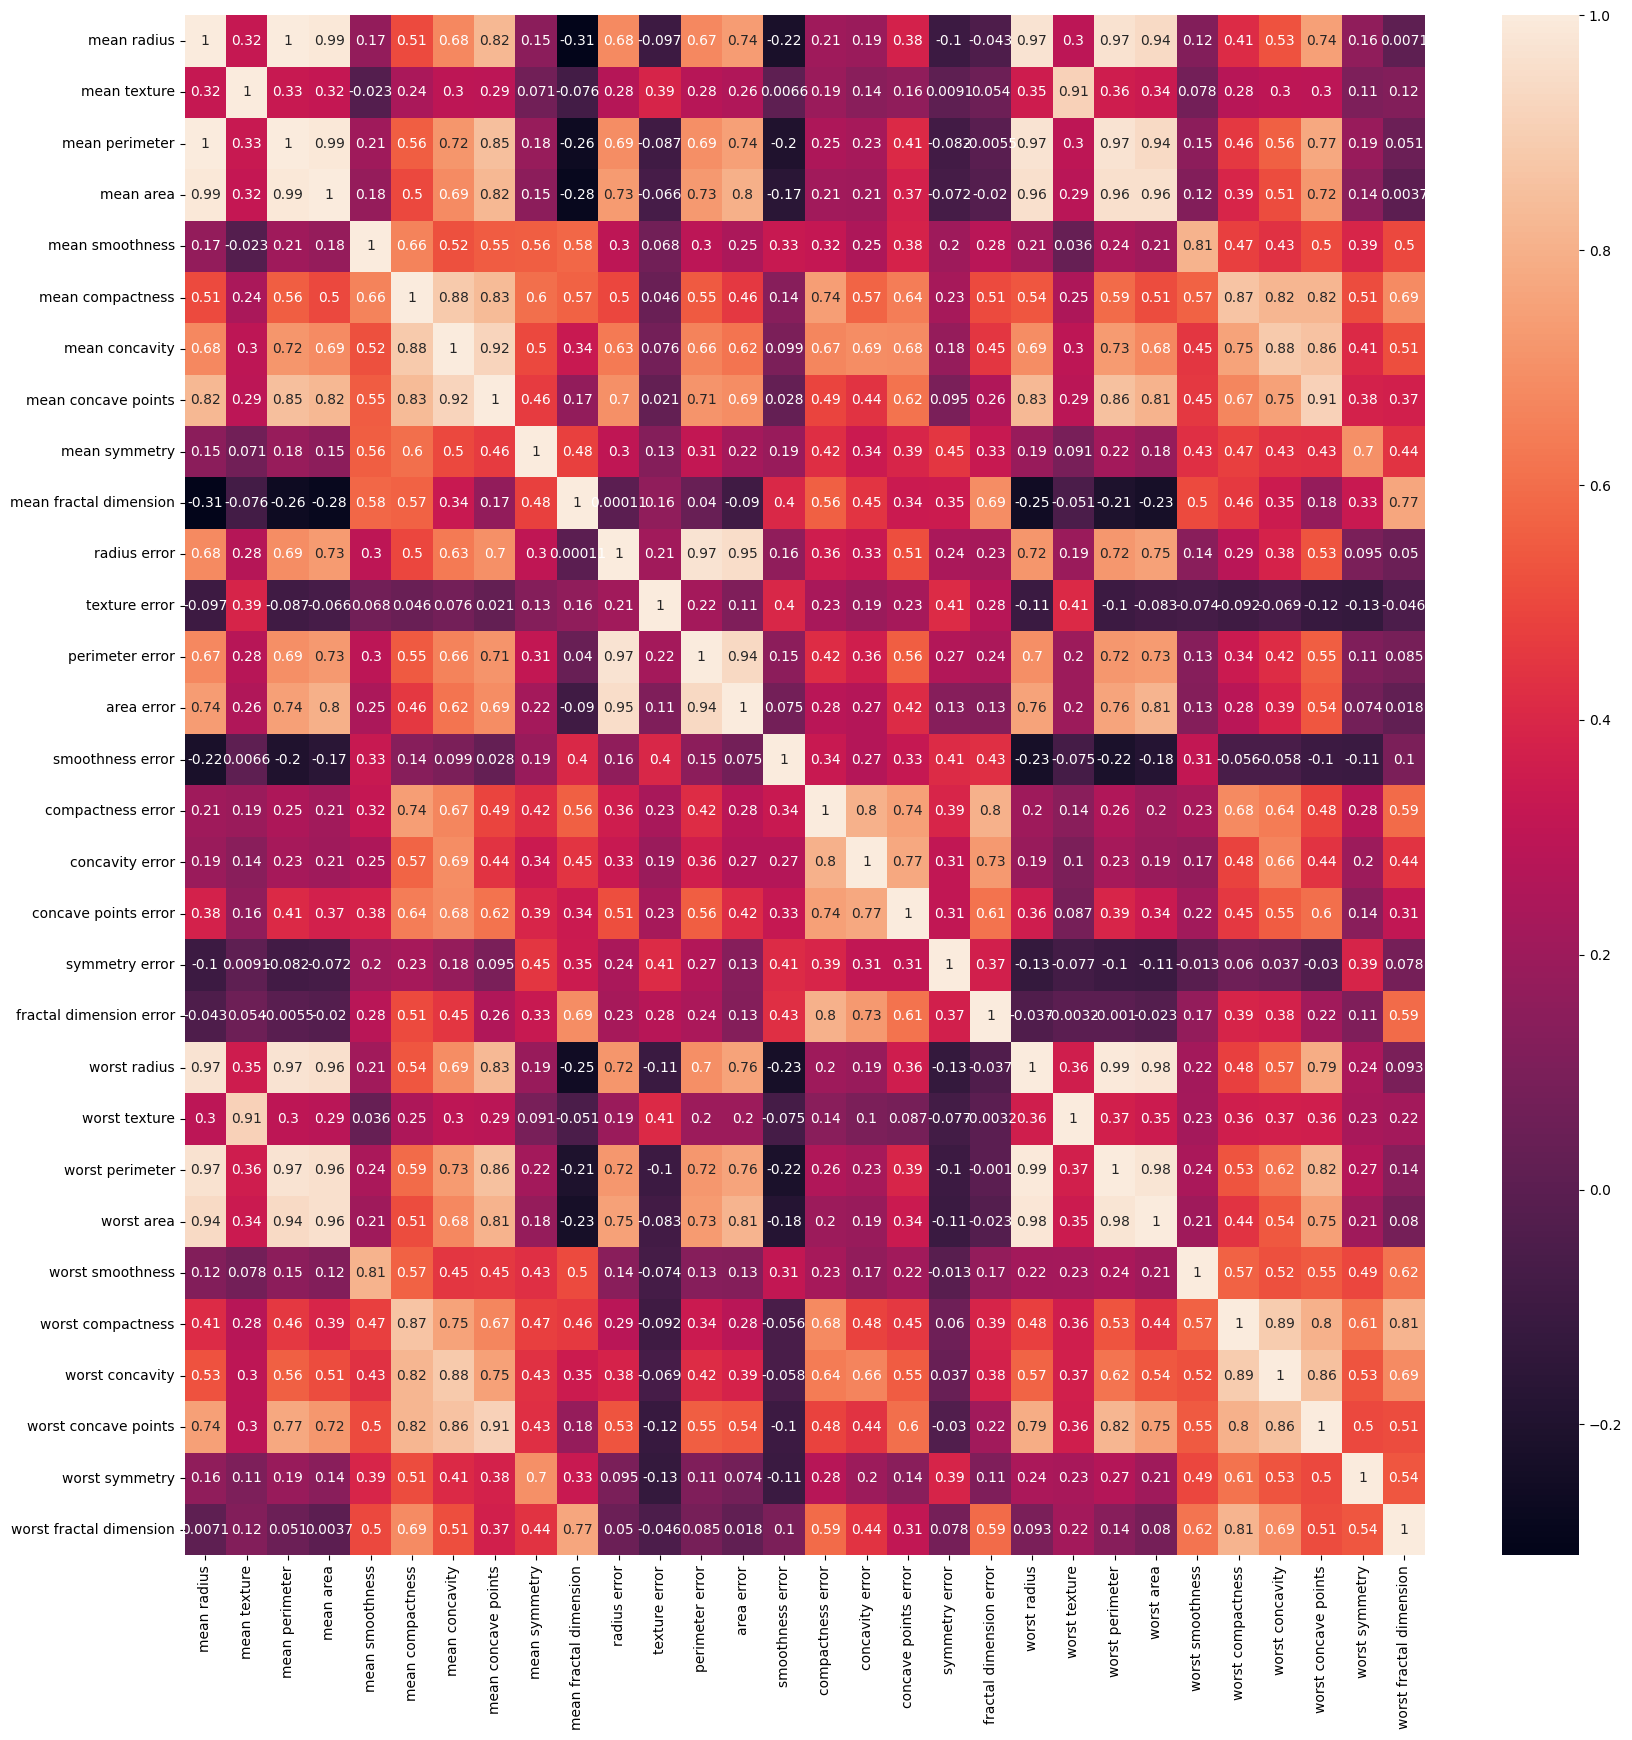

In [86]:
# Importamos la biblioteca de seaborn para la visualización de datos
import seaborn as sns

# Calculamos la matriz de correlación entre las características del DataFrame "df"
correlation_mat = df.corr()

# Generamos un mapa de calor con valores de correlación y etiquetas (anotaciones) en cada celda
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_mat, annot=True)
plt.show()


Podemos observar que existen fuertes correlaciones entre las características "mean_radius," "mean_perimeter," "mean_area," "worst_radius," "worst_perimeter," y "worst_area" en el conjunto de datos. Estas correlaciones sugieren una alta redundancia entre estas características, lo que significa que proporcionan información similar o casi idéntica sobre los datos. Desde una perspectiva técnica, estas características redundantes pueden introducir multicolinealidad en un modelo, lo que puede dificultar la interpretación de los coeficientes y afectar negativamente a la estabilidad del modelo.

### Enfoques basados en filtros

En esta sección, daremos inicio a nuestros **enfoques basados en filtros** para la selección de características. Para llevar a cabo este proceso, haremos uso del módulo `sklearn.feature_selection` de la biblioteca scikit-learn. Este módulo nos proporciona una variedad de técnicas de selección de características que son fundamentales en la ingeniería de características y desempeñan un papel crucial en la mejora de la eficiencia y eficacia de nuestros modelos de machine learning.

El objetivo principal de los enfoques basados en filtros es clasificar y priorizar las características de nuestro conjunto de datos en función de ciertas métricas o coeficientes específicos. Esta clasificación nos permitirá identificar cuáles son las características más relevantes y significativas para nuestro problema de modelado.

Para llevar a cabo esta tarea, utilizaremos diferentes coeficientes según el tipo de problema que estemos abordando:
- En el contexto de un problema de clasificación, emplearemos coeficientes como `f_classif`, `chi2`, y `mutual_info_classif`.

- Por otro lado, si nuestro problema es de regresión, nos apoyaremos en coeficientes como `f_regression` y `mutual_info_regression`.

La elección del coeficiente adecuado dependerá de la naturaleza de nuestro conjunto de datos y de los objetivos específicos de nuestro análisis. Estos enfoques basados en filtros nos brindarán valiosa información para seleccionar las características más relevantes, contribuyendo así a la construcción de modelos más precisos y eficientes.

El dataset con el que estamos trabajando, "load_breast_cancer", es un conjunto de datos de clasificación binaria clásico y muy sencillo.

In [92]:
# Evaluación y selección de características (obtener ranking de características)

# Importar las bibliotecas necesarias
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# Utilizar SelectKBest para calcular la puntuación de características basada en mutual_info_classif y seleccionar todas las características (k='all')
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all').fit(X, y)

# Crear un DataFrame a partir de las puntuaciones obtenidas
dfscores = pd.DataFrame(bestfeatures.scores_)

# Concatenar los nombres de las características y sus puntuaciones en un solo DataFrame
featureScores = pd.concat([pd.DataFrame(feature_names), dfscores], axis=1)

# Renombrar las columnas del DataFrame con nombres descriptivos
featureScores.columns = ['Caracteristica', 'Chi2']

# Ordenar el DataFrame en orden descendente según las puntuaciones de Mutual Information
featureScores = featureScores.nlargest(len(featureScores), 'Chi2')


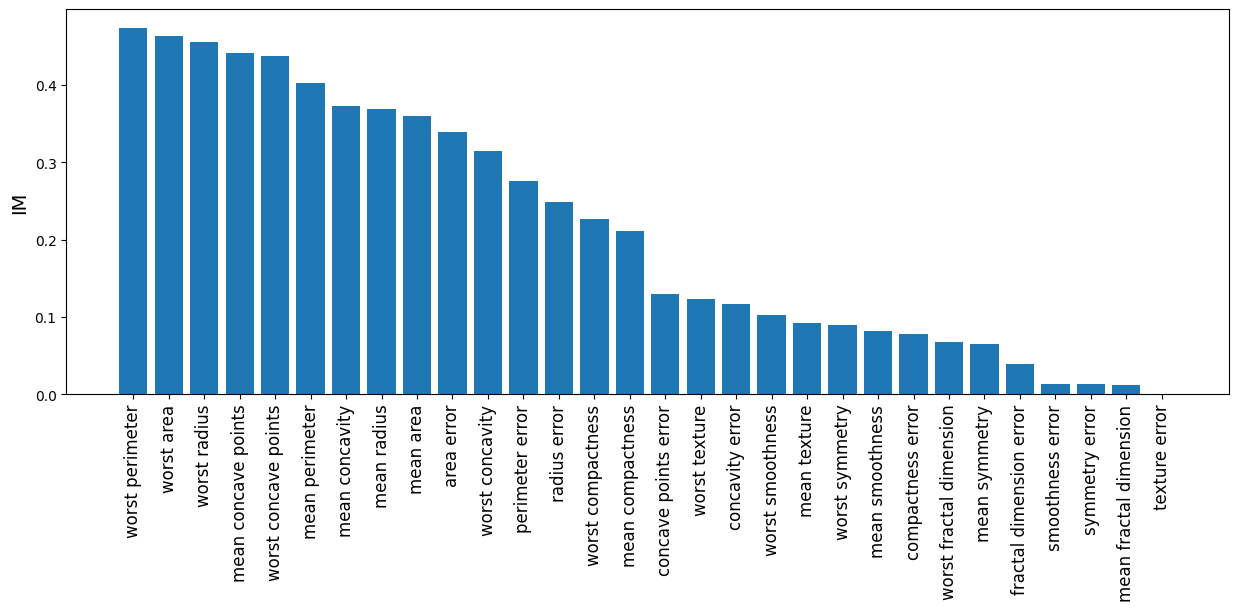

In [93]:
# Representación del ranking de características basado en IM

plt.figure(figsize=(15,5))
xs = np.linspace(start=0, stop = len(featureScores)-1, num=len(featureScores))
plt.bar(xs, featureScores['Chi2'].values)
plt.xticks(xs, featureScores['Caracteristica'], rotation=90, fontsize=12)
plt.ylabel('IM', fontsize=14)
plt.show()

Al analizar los valores obtenidos, se puede identificar un cambio significativo en la dinámica del conjunto de datos cerca de un valor de Importancia Mutua (IM) igual a 0.2. Este hallazgo sugiere la posibilidad de establecer un umbral en este valor y retener únicamente las características que exhiban un valor de Importancia Mutua mayor que 0.2.

Es fundamental ejercer la debida prudencia al llevar a cabo la selección de características mediante métodos de filtro, ya que dichos métodos no consideran el tipo de modelo que se construirá con los datos ni sus objetivos específicos. Por lo tanto, se recomienda encarecidamente generar múltiples rankings de características utilizando diversas métricas y, en última instancia, seleccionar las características que cumplan con los criterios en base al conjunto de métricas obtenidas.

En el código presentado previamente, realizar un cambio de métrica es un procedimiento sencillo, que implica la modificación de la función de puntuación (score_func) utilizada para obtener los resultados del método `SelectKBest() . Esto facilita la adaptación del proceso de selección de características a diferentes métricas y criterios según sea necesario.

### Enfoques embebidos (métodos wrapper)

En el contexto de los métodos de envoltura (conocidos como '**wrapper methods**' en inglés), la selección de características se aborda de manera iterativa con el objetivo de encontrar un subconjunto óptimo de características. Esto implica seleccionar inicialmente un conjunto de características y entrenar un modelo utilizando dichas características. Posteriormente, basándonos en los resultados obtenidos, se toma la decisión de agregar o eliminar características del subconjunto y se procede a evaluar nuevamente el modelo. Este proceso iterativo de selección de características puede llevarse a cabo de diversas formas, incluyendo enfoques de **selección hacia adelante, hacia atrás y mediante la eliminación recursiva** de características.

Las condiciones de convergencia en este método pueden variar y dependerán de los objetivos del estudio y de la pericia del experto que lleva a cabo el proceso de ingeniería de características.

En este ejemplo, consideraremos una condición de convergencia en la cual la evaluación iterativa se detiene cuando agregar la siguiente característica no conduce a una mejora significativa en el valor de la función de coste (es decir, el error de estimación). No obstante, es importante mencionar que se pueden agregar condiciones adicionales, como requerir que la mejora sea de al menos un cierto porcentaje o que esta mejora se mantenga durante al menos dos iteraciones consecutivas, entre otras posibilidades.

En la librería scikit-learn (sklearn), encontramos la función RFE (Recursive Feature Elimination) que resulta útil para llevar a cabo este tipo de selección de características. RFE nos proporciona la selección óptima de características para un modelo dado, teniendo en cuenta el número deseado de características a considerar como entrada principal. Por lo tanto, los parámetros clave que debemos especificar son el modelo y el número de características que se desean retener.

El paso de eliminar características altamente correlacionadas se realiza antes de la selección de características mediante Recursive Feature Elimination (RFE) y la evaluación de modelos con Random Forest para mejorar la calidad de los datos, reducir la complejidad del proceso y permitir que los modelos se enfoquen en las características más relevantes. Esto facilita la selección de características y la evaluación de modelos más efectiva.

In [94]:
# eliminar colinealidades entre “mean_radius” , “mean perimeter”, “mean área”, “worst radius”, “worst_perimeter” i “worst area” (a partir de la matriz de correlación)
df.drop(columns=['mean perimeter', 'mean area','worst radius', 'worst perimeter', 'worst area'], inplace=True)

# eliminar colinealidades entre “radius error”, “perimeter error” , “área error” (a partir de la matriz de correlación)
df.drop(columns=['perimeter error', 'area error'], inplace=True)

X = df.values

  En el siguiente código, se están utilizando varias bibliotecas y funciones de Python relacionadas con la selección de características y la evaluación de modelos. El objetivo principal es realizar una selección óptima de características para modelos de clasificación utilizando la técnica de Recursive Feature Elimination (RFE) y evaluar el rendimiento de los modelos resultantes.

Este código se enfoca en dos funciones principales:

1. **Función get_models():**
   - Esta función tiene como objetivo crear y configurar una serie de modelos de clasificación basados en el algoritmo Random Forest.
   - Se itera a través de un rango de números de características (desde 2 hasta el número total de características en el conjunto de datos).
   - Para cada número de características, se crea un modelo de Random Forest con RFE configurado para seleccionar ese número específico de características.
   - Cada modelo se almacena en un diccionario, donde la clave es el número de características seleccionadas y el valor es el modelo configurado.

2. **Función evaluate_model():**
   - Esta función se encarga de evaluar el rendimiento de un modelo dado.
   - Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`.
   - Entrena el modelo en el conjunto de entrenamiento y realiza predicciones en el conjunto de prueba.
   - Calcula y devuelve una métrica de evaluación, en este caso, la precisión del modelo.

Después de definir estas funciones, el código procede de la siguiente manera:
- Se asignan los datos de entrada (`X`) y la variable objetivo (`y`).
- Luego, se llama a la función `get_models()` para obtener una serie de modelos configurados con diferentes números de características seleccionadas.
- A continuación, se evalúan estos modelos utilizando la función `evaluate_model()`, y se almacenan las métricas de evaluación en las listas `results` y `names`.
- Finalmente, se muestra en la consola la precisión de cada modelo en función del número de características seleccionadas.

Este proceso permite identificar cuántas características son necesarias para obtener el mejor rendimiento predictivo y cómo varía la precisión a medida que se modifica el conjunto de características.

In [97]:
# Cargamos las librerías necesarias
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, len(X.T)+1):
		rfe = RFE(estimator=RandomForestClassifier(random_state=44), n_features_to_select=i)
		model = RandomForestClassifier(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = model.score(X_test, y_test)
  return scores


# definir las variables entrada-salida
X=X
y=y.reshape(-1, 1)

# Obtener modelos a evaluar
models = get_models()

# evaluar los modelos y almacenar métricas
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>N_caracteristicas %s --> mape: %.3f' % (name, scores))

>N_caracteristicas 2 --> mape: 0.930
>N_caracteristicas 3 --> mape: 0.942
>N_caracteristicas 4 --> mape: 0.942
>N_caracteristicas 5 --> mape: 0.953
>N_caracteristicas 6 --> mape: 0.947
>N_caracteristicas 7 --> mape: 0.959
>N_caracteristicas 8 --> mape: 0.965
>N_caracteristicas 9 --> mape: 0.959
>N_caracteristicas 10 --> mape: 0.959
>N_caracteristicas 11 --> mape: 0.965
>N_caracteristicas 12 --> mape: 0.965
>N_caracteristicas 13 --> mape: 0.965
>N_caracteristicas 14 --> mape: 0.965
>N_caracteristicas 15 --> mape: 0.965
>N_caracteristicas 16 --> mape: 0.965
>N_caracteristicas 17 --> mape: 0.965
>N_caracteristicas 18 --> mape: 0.965
>N_caracteristicas 19 --> mape: 0.965
>N_caracteristicas 20 --> mape: 0.965
>N_caracteristicas 21 --> mape: 0.959
>N_caracteristicas 22 --> mape: 0.959
>N_caracteristicas 23 --> mape: 0.965


Como puede observarse, en cada iteración de este proceso de selección de características se considera un número específico de características. En cada iteración, se selecciona la combinación de características que proporciona los resultados más prometedores en términos de precisión. Tras realizar estas iteraciones, se ha determinado que la iteración que incluye 8 características ha demostrado ser la más efectiva en términos de precisión del modelo.

Las 8 características seleccionadas en esta iteración, que han demostrado ser las más influyentes en la mejora de la precisión, son las siguientes:

In [96]:
df.columns[models['6'][0].support_==True]

Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'worst concavity', 'worst concave points'],
      dtype='object')

## Reducción de dimensionalidad

Cuando trabajamos con un conjunto de datos que posee un número considerable de características, es prudente considerar la posibilidad de realizar una reducción de dimensionalidad. Una de las técnicas más comúnmente empleadas con este fin es el [Análisis de Componentes Principales](https://medium.com/@nicolasurrego/descodificando-el-adn-de-los-datos-el-análisis-de-componentes-principales-pca-como-llave-maestra-79c9156cd6e4) (PCA).

Este método implica una transformación ortogonal de las características, lo que nos permite evaluar si un conjunto específico de componentes puede explicar una porción significativa de la varianza presente en los datos. Generalmente, se seleccionan como componentes principales aquellos que tienen la capacidad de explicar al menos el 70-80% de la varianza total de los datos.

Al emplear estos componentes principales en nuestro análisis, podemos construir modelos y aplicar algoritmos de interés de manera eficiente, aprovechando un conjunto de datos con una dimensionalidad reducida.

Para llevar a cabo el Análisis de Componentes Principales (PCA), utilizaremos el módulo `sklearn.decomposition` de la biblioteca scikit-learn. A continuación, se presenta el código que nos habilitará la obtención de componentes ortogonales y la identificación de los componentes principales del conjunto de datos previamente empleado, *breast_cance*r

In [99]:
# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Módulo de Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

# Crear una instancia del objeto PCA con un número de componentes igual al número de características originales
pca = PCA(n_components=len(X_std.T))

# Realizar el análisis de componentes principales en los datos estandarizados
x_componentes = pca.fit_transform(X_std)

# Calcular la varianza explicada por cada componente principal
var_exp = pca.explained_variance_ratio_

# Calcular la varianza acumulativa explicada
cum_var_exp = np.cumsum(var_exp)


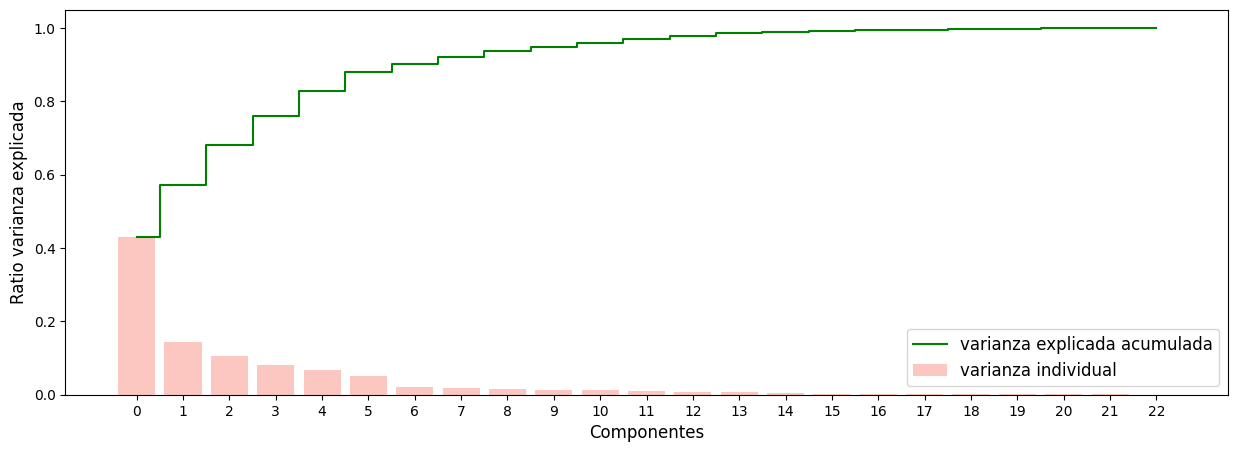

In [100]:
#Representar varianza y varianza acumulada junto con los componentes
plt.figure(figsize=(15, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.44, align='center', label='varianza individual', color = 'salmon')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='varianza explicada acumulada', color='g')
plt.xticks(ticks = range(len(cum_var_exp)))
plt.ylabel('Ratio varianza explicada', fontsize=12)
plt.xlabel('Componentes', fontsize=12)
plt.legend(loc='lower right', fontsize=12)


Al observar el gráfico de varianza explicada por cada componente principal, se puede notar que al seleccionar cuatro componentes principales, se logra explicar al menos el 70% de la variabilidad presente en los datos. Esto sugiere que estas cuatro componentes capturan las tendencias y patrones más significativos en los datos originales. En consecuencia, al reducir la dimensionalidad de los datos a estas cuatro componentes principales, conservamos la mayor parte de la información relevante mientras eliminamos la redundancia y el ruido en los datos.

Es importante destacar que la elección del número óptimo de componentes principales depende en gran medida de la aplicación específica y de los requisitos de precisión. En algunos casos, puede ser necesario conservar más componentes para garantizar una representación más completa de los datos, mientras que en otros, cuatro componentes pueden ser suficientes para mantener una representación adecuada.

En el contexto de este análisis, reducir los datos a cuatro componentes principales permitirá simplificar la representación de los datos, lo que puede ser beneficioso para aplicaciones posteriores, como modelos de aprendizaje automático o visualizaciones. Además, al mantener el 70% de la varianza, es probable que retengamos la mayoría de la información esencial de los datos originales, lo que facilitará la interpretación y el análisis subsiguientes.

Por tanto, los datos con los 4 componentes principales quedarán así:

In [101]:
cum_var_exp

array([0.43086476, 0.57328926, 0.68014805, 0.76023719, 0.82727438,
       0.87959814, 0.90173629, 0.92073175, 0.93641767, 0.94884863,
       0.96044987, 0.97041631, 0.97883234, 0.98553353, 0.98914892,
       0.99171017, 0.99393503, 0.99543354, 0.99674376, 0.9979785 ,
       0.99900342, 0.99964387, 1.        ])

In [103]:
# Crear una instancia de PCA con un número específico de componentes principales (en este caso, 4)
pca_pc = PCA(n_components=4)

# Aplicar PCA a los datos estandarizados X_std, reduciendo las dimensiones a 4 componentes principales
X_pc = pca_pc.fit_transform(X_std)

# Obtener la forma (shape) de la matriz X_pc para conocer las dimensiones resultantes
X_pc.shape


(569, 4)

## Autoría

Este proyecto de ingeniería de características ha sido realizado por Nicolás Urrego, para encontrar artículos sobre análisis y ciencia de datos puedes visitar mi [blog](https://medium.com/@nicolasurrego).

También puedes encontrar más información sobre mis proyectos en mi perfil de [LinkedIn](https://www.linkedin.com/in/nicolasurregovallejo/) y en [Github](https://github.com/nicolasurregov).